In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
from tqdm import tqdm_notebook as tqdm

/tmp/ipykernel_42129/1586382708.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: The number in the fnlwgt field indicates how many people in the U.S. population are represented by the corresponding record in the dataset.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
6. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
7. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9. sex: Female, Male.
10. capital-gain: total amount of profit an individual earns from the sale of assets like stocks, bonds, property, or businesses, within a given year
11. capital-loss:  attribute reflects the total amount of loss an individual incurs from the sale of assets, such as stocks, bonds, real estate, or business investments, within a given year.
13. hours-per-week: attribute refers to the total number of hours an individual typically works in a week
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
adult = pd.read_csv(
    "/home/ana/University/MitigatingBiasInDataScience/row_data/adult.csv"
)
adult = adult.map(lambda x: x.strip() if isinstance(x, str) else x)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
print("data with duplicated rows ", adult.shape)
adult = adult.drop_duplicates()
print("data without duplicated rows", adult.shape)

data with duplicated rows  (48842, 15)
data without duplicated rows (48790, 15)


In [5]:
adult["income"].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [6]:
adult["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
adult["income"] = adult["income"].replace({"<=50K": 0, ">50K": 1})
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
print("workclass", adult["workclass"].unique())
print("education", adult["education"].unique())
print("marital-status", adult["marital-status"].unique())
print("occupation", adult["occupation"].unique())
print("relationship", adult["relationship"].unique())
print("race", adult["race"].unique())
print("sex", adult["sex"].unique())
print("native-country", adult["native-country"].unique())
adult = adult.replace("?", pd.NA)

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native-country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

In [10]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       45995 non-null  object
 2   fnlwgt          48790 non-null  int64 
 3   education       48790 non-null  object
 4   education-num   48790 non-null  int64 
 5   marital-status  48790 non-null  object
 6   occupation      45985 non-null  object
 7   relationship    48790 non-null  object
 8   race            48790 non-null  object
 9   sex             48790 non-null  object
 10  capital-gain    48790 non-null  int64 
 11  capital-loss    48790 non-null  int64 
 12  hours-per-week  48790 non-null  int64 
 13  native-country  47934 non-null  object
 14  income          48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [11]:
### Fill in Nan values
adult["native-country"].fillna(adult["native-country"].mode()[0], inplace=True)
adult["workclass"].fillna(adult["workclass"].mode()[0], inplace=True)
adult["occupation"].fillna(adult["occupation"].mode()[0], inplace=True)

/tmp/ipykernel_42129/1487820695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult["native-country"].fillna(adult["native-country"].mode()[0], inplace=True)
/tmp/ipykernel_42129/1487820695.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [12]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   fnlwgt          48790 non-null  int64 
 3   education       48790 non-null  object
 4   education-num   48790 non-null  int64 
 5   marital-status  48790 non-null  object
 6   occupation      48790 non-null  object
 7   relationship    48790 non-null  object
 8   race            48790 non-null  object
 9   sex             48790 non-null  object
 10  capital-gain    48790 non-null  int64 
 11  capital-loss    48790 non-null  int64 
 12  hours-per-week  48790 non-null  int64 
 13  native-country  48790 non-null  object
 14  income          48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


## Fairness check

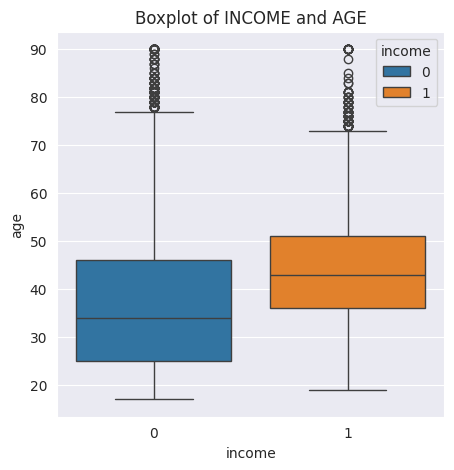

In [40]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x="income", y="age", data=adult, hue="income").set_title(
    "Boxplot of INCOME and AGE"
)
plt.show()

In [41]:
adult.groupby("income")["age"].median()  # as expected older people earn more

income
0    34.0
1    43.0
Name: age, dtype: float64

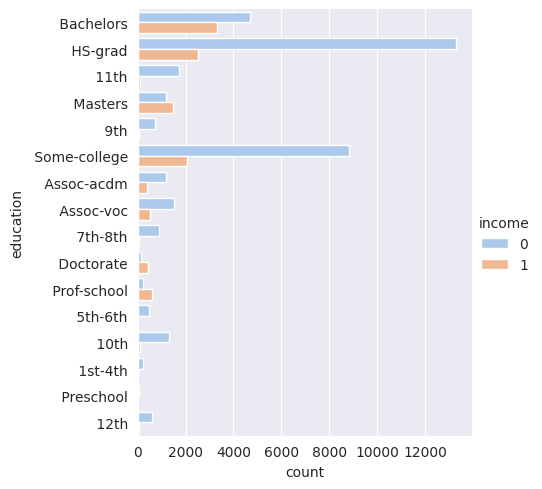

In [43]:
sns.catplot(y="education", hue="income", kind="count", palette="pastel", data=adult)

<Axes: xlabel='sex', ylabel='count'>

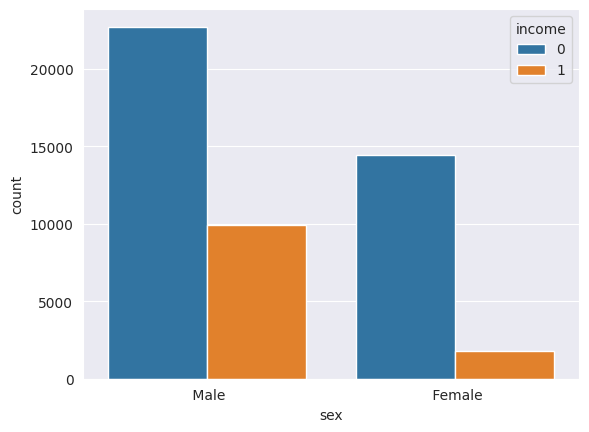

In [48]:
sns.countplot(x="sex", hue="income", data=adult)  # the sensitive attribute is gender

In [54]:
adult["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [73]:
print(
    "Probability of getting income >=50K on the whole dataset:",
    adult[adult["income"] == 1].shape[0] / adult.shape[0],
)
print(
    "Probability of getting income >=50K if female:",
    adult[(adult["income"] == 1) & (adult["sex"] == "Female")].shape[0]
    / adult[adult["sex"] == "Female"].shape[0],
)
print(
    "Probability of getting income >=50K if male:",
    adult[(adult["income"] == 1) & (adult["sex"] == "Male")].shape[0]
    / adult[adult["sex"] == "Male"].shape[0],
)

Probability of getting income >=50K on the whole dataset: 0.23941381430621028
Probability of getting income >=50K if female: 0.1093595450049456
Probability of getting income >=50K if male: 0.3039185625804869


#### Disparity measurement P(Y=1|disfavored)/P(Y=1|favored)

In [78]:
f"""Disparity: {adult[(adult['income']==1) & (adult['sex']=='Female')].shape[0]
/ adult[(adult['income']==1) & (adult['sex']=="Male")].shape[0]}"""

'Disparity: 0.17847054075867635'

## Feature preprocessing

In [13]:
### Education - it is reasonable to map value in less categories
replace_dict = {
    "Preschool": "dropout",
    "10th": "dropout",
    "11th": "dropout",
    "12th": "dropout",
    "1st-4th": "dropout",
    "5th-6th": "dropout",
    "7th-8th": "dropout",
    "9th": "dropout",
    "HS-Grad": "HighGrad",
    "HS-grad": "HighGrad",
    "Some-college": "CommunityCollege",
    "Assoc-acdm": "CommunityCollege",
    "Assoc-voc": "CommunityCollege",
    "Bachelors": "Bachelors",
    "Masters": "Masters",
    "Prof-school": "Masters",
    "Doctorate": "Doctorate",
}

adult["education"].replace(replace_dict, inplace=True)
adult.head()

/tmp/ipykernel_42129/2684369184.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult["education"].replace(replace_dict, inplace=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HighGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,dropout,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [14]:
### Marital status
marital_status_map = {
    "Never-married": "NotMarried",
    "Married-AF-spouse": "Married",
    "Married-civ-spouse": "Married",
    "Married-spouse-absent": "Separated",
    "Separated": "Separated",
    "Divorced": "NotMarried",
    "Widowed": "NotMarried",
}

adult["marital-status"].replace(marital_status_map, inplace=True)

/tmp/ipykernel_42129/1816182035.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult["marital-status"].replace(marital_status_map, inplace=True)


#### Remove outliers  - Make Wife and Husband Married

In [15]:
adult[(adult["sex"] == "Male") & (adult["relationship"] == "Wife")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
575,29,Private,350162,Bachelors,13,Married,Exec-managerial,Wife,White,Male,0,0,40,United-States,1
27141,36,Private,74791,Bachelors,13,Married,Sales,Wife,White,Male,0,0,60,United-States,0
38222,64,Local-gov,152172,dropout,6,Married,Machine-op-inspct,Wife,White,Male,0,0,40,United-States,0


In [87]:
adult[(adult["sex"] == "Female") & (adult["relationship"] == "Husband")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7109,34,Private,175878,HighGrad,9,Married,Sales,Husband,White,Female,0,0,40,United-States,0


In [16]:
adult["relationship"].replace({"Husband": "Married", "Wife": "Married"}, inplace=True)

/tmp/ipykernel_42129/14544050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult["relationship"].replace({"Husband": "Married", "Wife": "Married"}, inplace=True)


#### Country mapping

In [17]:
adult["native-country"].value_counts()

native-country
United-States                 44648
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [18]:
country_to_area = {
    "Cuba": "North America",
    "Jamaica": "North America",
    "Mexico": "North America",
    "Puerto-Rico": "North America",
    "Honduras": "North America",
    "Canada": "North America",
    "Guatemala": "North America",
    "Haiti": "North America",
    "Dominican-Republic": "North America",
    "El-Salvador": "North America",
    "Outlying-US(Guam-USVI-etc)": "North America",
    "Holand-Netherlands": "Europe",  # Assuming this refers to the Netherlands
    "Columbia": "South America",
    "Ecuador": "South America",
    "Peru": "South America",
    "England": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    "France": "Europe",
    "Portugal": "Europe",
    "Yugoslavia": "Europe",
    "Scotland": "Europe",
    "Greece": "Europe",
    "Ireland": "Europe",
    "Hungary": "Europe",
    "India": "Asia",
    "Iran": "Asia",
    "Philippines": "Asia",
    "Cambodia": "Asia",
    "Thailand": "Asia",
    "Laos": "Asia",
    "Taiwan": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "Vietnam": "Asia",
    "Hong": "Asia",  # Assuming this refers to Hong Kong
    "Trinadad&Tobago": "Central America",
    "Nicaragua": "Central America",
}
adult["native-country"].replace(country_to_area, inplace=True)

In [19]:
adult["native-country"].value_counts()

native-country
United-States      44648
North America       2015
Asia                 980
Europe               780
South America        176
South                115
Central America       76
Name: count, dtype: int64

#### Other features

In [20]:
adult["workclass"].value_counts()

workclass
Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [21]:
adult["race"].value_counts()

race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [22]:
adult["occupation"].value_counts()

occupation
Prof-specialty       8970
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [23]:
adult.to_csv(
    "/home/ana/University/MitigatingBiasInDataScience/processed_data/adult.csv",
    index=False,
)

### Measure initial fairness

In [24]:
import sys

sys.path.insert(0, "..")
from fair_metrics.group_fairness import disparity_ratio, social_benefit
from fair_metrics.individual_fairness import equalized_odds

In [26]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,NotMarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,HighGrad,9,NotMarried,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,dropout,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Married,Black,Female,0,0,40,North America,0


In [29]:
adult["education"].value_counts()

education
HighGrad            15770
CommunityCollege    14524
Bachelors            8013
dropout              6399
Masters              3490
Doctorate             594
Name: count, dtype: int64

In [33]:
adult["hours-per-week"].value_counts()

hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
79        1
94        1
82        1
87        1
69        1
Name: count, Length: 96, dtype: int64

In [27]:
disparity_ratio(adult, "income", "sex", "Male", "Female")

0.359831739385724

In [30]:
equalized_odds(adult, "income", "sex", "education", lambda x: x == "Masters", "Male", "Female")

0.5269717727108284

In [32]:
equalized_odds(adult, "income", "sex", "marital-status", lambda x: x == "NotMarried", "Male", "Female")

0.6138947972760318

In [34]:
equalized_odds(adult, "income", "sex", "hours-per-week", lambda x: x < 40, "Male", "Female")

0.6407054724303742

In [38]:
adult["workclass"].value_counts()

workclass
Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [42]:
print(adult[["workclass"]].value_counts())
workclass_encoding = {
    "Private": 1,           
    "Self-emp-not-inc": 2,   
    "Local-gov": 3,       
    "State-gov":4 ,       
    "Self-emp-inc": 5,         
    "Federal-gov": 6,        
    "Without-pay":7,           
    "Never-worked":8           
}
adult["workclass"] = adult["workclass"].replace(workclass_encoding)

workclass       
Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipykernel_42129/2895341927.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["workclass"] = adult["workclass"].replace(workclass_encoding)


In [43]:
print(adult[["occupation"]].value_counts())
occupation_encoding = {
    "Prof-specialty": 1,           
    "Craft-repair": 2,   
    "Exec-managerial": 3,       
    "Adm-clerical":4 ,       
    "Sales": 5,         
    "Other-service": 6,        
    "Machine-op-inspct":7,           
    "Transport-moving":8,
    "Handlers-cleaners": 9,    
    "Farming-fishing": 10,     
    "Tech-support": 11,       
    "Protective-serv": 12,       
    "Priv-house-serv": 13,
    "Armed-Forces": 14        
}
adult["occupation"] = adult["occupation"].replace(occupation_encoding)

occupation       
Prof-specialty       8970
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipykernel_42129/1654746198.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["occupation"] = adult["occupation"].replace(workclass_encoding)


In [45]:
adult = adult.drop(columns=["fnlwgt"])

In [48]:
print(adult[["education"]].value_counts())
education_encoding = {
   "HighGrad": 1,            
"CommunityCollege": 2,    
"Bachelors": 3,       
"dropout": 4,           
"Masters": 5,            
"Doctorate":   6   
}
adult["education"] = adult["education"].replace(education_encoding)

education       
HighGrad            15770
CommunityCollege    14524
Bachelors            8013
dropout              6399
Masters              3490
Doctorate             594
Name: count, dtype: int64


/tmp/ipykernel_42129/3921302027.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["education"] = adult["education"].replace(education_encoding)


In [51]:
print(adult[["native-country"]].value_counts())
country_encoding = {
   "United-States": 1,            
"North America": 2,    
"Asia": 3,       
"Europe": 4,           
"South America": 5,            
"South":   6, 
"Central America": 7
}
adult["native-country"] = adult["native-country"].replace(country_encoding)

native-country 
United-States      44648
North America       2015
Asia                 980
Europe               780
South America        176
South                115
Central America       76
Name: count, dtype: int64


/tmp/ipykernel_42129/1074958980.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["native-country"] = adult["native-country"].replace(country_encoding)


In [54]:
print(adult[["marital-status"]].value_counts())
marital_encoding = {
   "NotMarried": 1,            
"Married": 2,    
"Separated": 3,       
}
adult["marital-status"] = adult["marital-status"].replace(marital_encoding)

marital-status
NotMarried        24230
Married           22403
Separated          2157
Name: count, dtype: int64


/tmp/ipykernel_42129/2499218873.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["marital-status"] = adult["marital-status"].replace(marital_encoding)


In [57]:
print(adult[["relationship"]].value_counts())
relationship_encoding = {
   "Married": 1,            
"Not-in-family": 2,    
"Own-child": 3,       
"Unmarried": 4,           
"Other-relative": 5,           
}
adult["relationship"] = adult["relationship"].replace(relationship_encoding)

relationship  
Married           22034
Not-in-family     12557
Own-child          7569
Unmarried          5124
Other-relative     1506
Name: count, dtype: int64


/tmp/ipykernel_42129/3365095078.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["relationship"] = adult["relationship"].replace(relationship_encoding)


In [62]:
print(adult[["race"]].value_counts())
race_encoding = {
   "White": 1,            
"Black": 2,    
"Asian-Pac-Islander": 3,       
"Amer-Indian-Eskimo": 4,           
"Other": 5,           
}
adult["race"] = adult["race"].replace(race_encoding)

race              
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


/tmp/ipykernel_42129/934400867.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["race"] = adult["race"].replace(race_encoding)


In [64]:
print(adult[["sex"]].value_counts())
gender_encoding = {
   "Male": 2,            
"Female": 1,              
}
adult["sex"] = adult["sex"].replace(gender_encoding)

sex   
Male      32614
Female    16176
Name: count, dtype: int64


/tmp/ipykernel_42129/2194864165.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult["sex"] = adult["sex"].replace(gender_encoding)


In [65]:
adult

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,3,13,1,4,2,1,2,2174,0,40,1,0
1,50,2,3,13,2,3,1,1,2,0,0,13,1,0
2,38,1,1,9,1,9,2,1,2,0,0,40,1,0
3,53,1,4,7,2,9,1,2,2,0,0,40,1,0
4,28,1,3,13,2,1,1,2,1,0,0,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,1,3,13,1,1,2,1,1,0,0,36,1,0
48838,64,1,1,9,1,1,5,2,2,0,0,40,1,0
48839,38,1,3,13,2,1,1,1,2,0,0,50,1,0
48840,44,1,3,13,1,4,3,3,2,5455,0,40,1,0


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [67]:
train, test = train_test_split(adult, test_size=0.15, stratify=adult["income"])
train.to_csv("../processed_data/Adult_train.csv")
test.to_csv("../processed_data/Adult_test.csv")

In [68]:
train_X, train_y = train.drop(columns=["income"]), train["income"]
test_X, test_y = test.drop(columns=["income"]), test["income"]

In [69]:
clf = RandomForestClassifier(random_state=42)
clf.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [70]:
social_benefit(test, "income", clf.predict)

0.8477934144008744